#**Midterm Skills Exam: Data Wrangling and Analysis**

##**CPE311 - Computational Thinking with Python**

Name: Dela Cruz, Gabrielle

Section: CPE22S3

Performed on: 07/10/2024

Submitted on: 07/xx/2024

Submitted to: Engr. Roman M. Richard

Link to Colab: https://colab.research.google.com/drive/1fq6mNUxo11dSaHQC1DUNm2uip5LTMC-M?usp=sharing


In [1]:
!pip install ucimlrepo

In [10]:
from ucimlrepo import fetch_ucirepo

census_income = fetch_ucirepo(id=20)
x = census_income.data.features
y = census_income.data.targets

print(census_income.metadata)
print(census_income.variables)

{'uci_id': 20, 'name': 'Census Income', 'repository_url': 'https://archive.ics.uci.edu/dataset/20/census+income', 'data_url': 'https://archive.ics.uci.edu/static/public/20/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data.  Also known as Adult dataset.', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5GP7S', 'creators': ['Ron Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && 

In [11]:
import pandas as pd
import numpy as np
x

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States


In [12]:
y

,income
0,<=50K
1,<=50K
2,<=50K
3,<=50K
4,<=50K
...,...
48837,<=50K.
48838,<=50K.
48839,<=50K.
48840,<=50K.


In [14]:
concatCensus = pd.concat([x, y], axis=1)
concatCensus

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [15]:
# Removing duplicate rows for cleaner data presentation.
concatCensus.drop_duplicates(inplace=True)

In [16]:
# Getting to know the Dtype and column names of data.
concatCensus.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48813 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48813 non-null  int64 
 1   workclass       47850 non-null  object
 2   fnlwgt          48813 non-null  int64 
 3   education       48813 non-null  object
 4   education-num   48813 non-null  int64 
 5   marital-status  48813 non-null  object
 6   occupation      47847 non-null  object
 7   relationship    48813 non-null  object
 8   race            48813 non-null  object
 9   sex             48813 non-null  object
 10  capital-gain    48813 non-null  int64 
 11  capital-loss    48813 non-null  int64 
 12  hours-per-week  48813 non-null  int64 
 13  native-country  48539 non-null  object
 14  income          48813 non-null  object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB


In [17]:
# Determining works/occupations in the dataset.
concatCensus.occupation.unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', '?', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv', nan], dtype=object)

In [18]:
# Determining workclasses in the dataset.
concatCensus.workclass.unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked',
       nan], dtype=object)

In [20]:
# Determining workers employed in native-country column in the dataset.
concatCensus['native-country'].unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', '?', 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands', nan], dtype=object)

In [19]:
# Getting to know the number of employed in the occupations column.
concatCensus.occupation.value_counts()

occupation
Prof-specialty       6167
Craft-repair         6107
Exec-managerial      6084
Adm-clerical         5608
Sales                5504
Other-service        4919
Machine-op-inspct    3019
Transport-moving     2355
Handlers-cleaners    2071
?                    1843
Farming-fishing      1487
Tech-support         1445
Protective-serv       983
Priv-house-serv       240
Armed-Forces           15
Name: count, dtype: int64

In [21]:
# Getting to know the number of employed in native-country column.
concatCensus['native-country'].value_counts()

native-country
United-States                 43810
Mexico                          947
?                               582
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Poland                           87
Guatemala                        86
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru         

In [26]:
# Converting categorical to numerical data and adding a dictionary to corresponding education column values.
education = dict(zip(concatCensus.education, concatCensus['education-num']))
concatCensus.drop(columns=['education'], inplace=True)
concatCensus

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [27]:
# Getting to know the totals of degrees of education.
education

{'Bachelors': 13,
 'HS-grad': 9,
 '11th': 7,
 'Masters': 14,
 '9th': 5,
 'Some-college': 10,
 'Assoc-acdm': 12,
 'Assoc-voc': 11,
 '7th-8th': 4,
 'Doctorate': 16,
 'Prof-school': 15,
 '5th-6th': 3,
 '10th': 6,
 '1st-4th': 2,
 'Preschool': 1,
 '12th': 8}

In [29]:
columns = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']
uniqueValues = []

for column in columns:
  uniqueValues.append(concatCensus[column].unique().tolist())
uniqueValues

[['State-gov',
  'Self-emp-not-inc',
  'Private',
  'Federal-gov',
  'Local-gov',
  '?',
  'Self-emp-inc',
  'Without-pay',
  'Never-worked',
  nan],
 ['Never-married',
  'Married-civ-spouse',
  'Divorced',
  'Married-spouse-absent',
  'Separated',
  'Married-AF-spouse',
  'Widowed'],
 ['Adm-clerical',
  'Exec-managerial',
  'Handlers-cleaners',
  'Prof-specialty',
  'Other-service',
  'Sales',
  'Craft-repair',
  'Transport-moving',
  'Farming-fishing',
  'Machine-op-inspct',
  'Tech-support',
  '?',
  'Protective-serv',
  'Armed-Forces',
  'Priv-house-serv',
  nan],
 ['Not-in-family',
  'Husband',
  'Wife',
  'Own-child',
  'Unmarried',
  'Other-relative'],
 ['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other'],
 ['Male', 'Female'],
 ['United-States',
  'Cuba',
  'Jamaica',
  'India',
  '?',
  'Mexico',
  'South',
  'Puerto-Rico',
  'Honduras',
  'England',
  'Canada',
  'Germany',
  'Iran',
  'Philippines',
  'Italy',
  'Poland',
  'Columbia',
  'Cambodia',
  'Thai

In [30]:
# Creating results dictionaries for further reference
results = []

for data in uniqueValues:
  keys = [i for i in data]
  values = [i for i in range(1, len(data)+1)]
  results.append({keys[i]:values[i] for i in range(len(values))})

results

[{'State-gov': 1,
  'Self-emp-not-inc': 2,
  'Private': 3,
  'Federal-gov': 4,
  'Local-gov': 5,
  '?': 6,
  'Self-emp-inc': 7,
  'Without-pay': 8,
  'Never-worked': 9,
  nan: 10},
 {'Never-married': 1,
  'Married-civ-spouse': 2,
  'Divorced': 3,
  'Married-spouse-absent': 4,
  'Separated': 5,
  'Married-AF-spouse': 6,
  'Widowed': 7},
 {'Adm-clerical': 1,
  'Exec-managerial': 2,
  'Handlers-cleaners': 3,
  'Prof-specialty': 4,
  'Other-service': 5,
  'Sales': 6,
  'Craft-repair': 7,
  'Transport-moving': 8,
  'Farming-fishing': 9,
  'Machine-op-inspct': 10,
  'Tech-support': 11,
  '?': 12,
  'Protective-serv': 13,
  'Armed-Forces': 14,
  'Priv-house-serv': 15,
  nan: 16},
 {'Not-in-family': 1,
  'Husband': 2,
  'Wife': 3,
  'Own-child': 4,
  'Unmarried': 5,
  'Other-relative': 6},
 {'White': 1,
  'Black': 2,
  'Asian-Pac-Islander': 3,
  'Amer-Indian-Eskimo': 4,
  'Other': 5},
 {'Male': 1, 'Female': 2},
 {'United-States': 1,
  'Cuba': 2,
  'Jamaica': 3,
  'India': 4,
  '?': 5,
  'Mexic

In [31]:
# Mapping the categorical data to numerical values.
for column in range(len(columns)):
  concatCensus.replace(results[column], inplace=True)
concatCensus

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,1.0,77516,13,1,1,1,1,1,2174,0,40,1,1
1,50,2.0,83311,13,2,2,2,1,1,0,0,13,1,1
2,38,3.0,215646,9,3,3,1,1,1,0,0,40,1,1
3,53,3.0,234721,7,2,3,2,2,1,0,0,40,1,1
4,28,3.0,338409,13,2,4,3,2,2,0,0,40,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,3.0,215419,13,3,4,1,1,2,0,0,36,1,3
48838,64,10.0,321403,9,7,10,6,2,1,0,0,40,1,3
48839,38,3.0,374983,13,2,4,2,1,1,0,0,50,1,3
48840,44,3.0,83891,13,3,1,4,3,1,5455,0,40,1,3


In [32]:
concatCensus.describe()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
count,48813.000000,48813.000000,4.881300e+04,48813.000000,48813.000000,48813.000000,48813.000000,48813.000000,48813.000000,48813.000000,48813.000000,48813.000000,48813.000000,48813.000000
mean,38.647348,3.390695,1.896679e+05,10.078688,2.084322,5.421507,2.539037,1.220290,1.331510,1079.708705,87.554299,40.425051,2.313072,1.906254
std,13.709005,1.501250,1.056062e+05,2.570257,1.257648,3.092434,1.440102,0.625738,0.470761,7454.185982,403.118605,12.390954,5.046379,1.032963
min,17.000000,1.000000,1.228500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,28.000000,3.000000,1.175550e+05,9.000000,1.000000,3.000000,1.000000,1.000000,1.000000,0.000000,0.000000,40.000000,1.000000,1.000000
50%,37.000000,3.000000,1.781400e+05,10.000000,2.000000,5.000000,2.000000,1.000000,1.000000,0.000000,0.000000,40.000000,1.000000,1.000000
75%,48.000000,3.000000,2.376200e+05,12.000000,2.000000,7.000000,4.000000,1.000000,2.000000,0.000000,0.000000,45.000000,1.000000,3.000000
max,90.000000,10.000000,1.490400e+06,16.000000,7.000000,15.000000,6.000000,5.000000,2.000000,99999.000000,4356.000000,99.000000,42.000000,4.000000


In [33]:
maleCensus = concatCensus.query('sex == 1')
femaleCensus = concatCensus.query('sex == 2')
lessthanCensus = concatCensus.query('income == 1')
morethanCensus = concatCensus.query('income == 2')

In [35]:
# Getting the average census for males of the dataset.
maleCensus.mean()

age                   39.497594
workclass              3.362447
fnlwgt            191738.905795
education-num         10.095492
marital-status         1.928320
occupation             5.816984
relationship           2.262389
race                   1.191107
sex                    1.000000
capital-gain        1326.980509
capital-loss         100.468174
hours-per-week        42.419264
native-country         2.312617
income                 1.969262
dtype: float64

In [36]:
femaleCensus.mean()

age                   36.932827
workclass              3.447658
fnlwgt            185491.732172
education-num         10.044803
marital-status         2.398900
occupation             4.624027
relationship           3.096898
race                   1.279137
sex                    2.000000
capital-gain         581.085156
capital-loss          61.513472
hours-per-week        36.403720
native-country         2.313991
income                 1.779199
dtype: float64

In [38]:
lessthanCensus.mean()

age                   36.787392
workclass              3.277674
fnlwgt            190345.926796
education-num          9.596081
marital-status         2.082557
occupation             5.464167
relationship           2.681756
race                   1.245688
sex                    1.388007
capital-gain         148.884970
capital-loss          53.190258
hours-per-week        38.842862
native-country         2.386954
income                 1.000000
dtype: float64

In [39]:
morethanCensus.mean()

age                   44.250925
workclass              3.412808
fnlwgt            188000.480674
education-num         11.612195
marital-status         2.089680
occupation             4.890292
relationship           2.105243
race                   1.146320
sex                    1.150402
capital-gain        4007.164562
capital-loss         195.051282
hours-per-week        45.473402
native-country         2.054089
income                 2.000000
dtype: float64

###**Using Matplotlib for Data Visualization**

<Axes: >

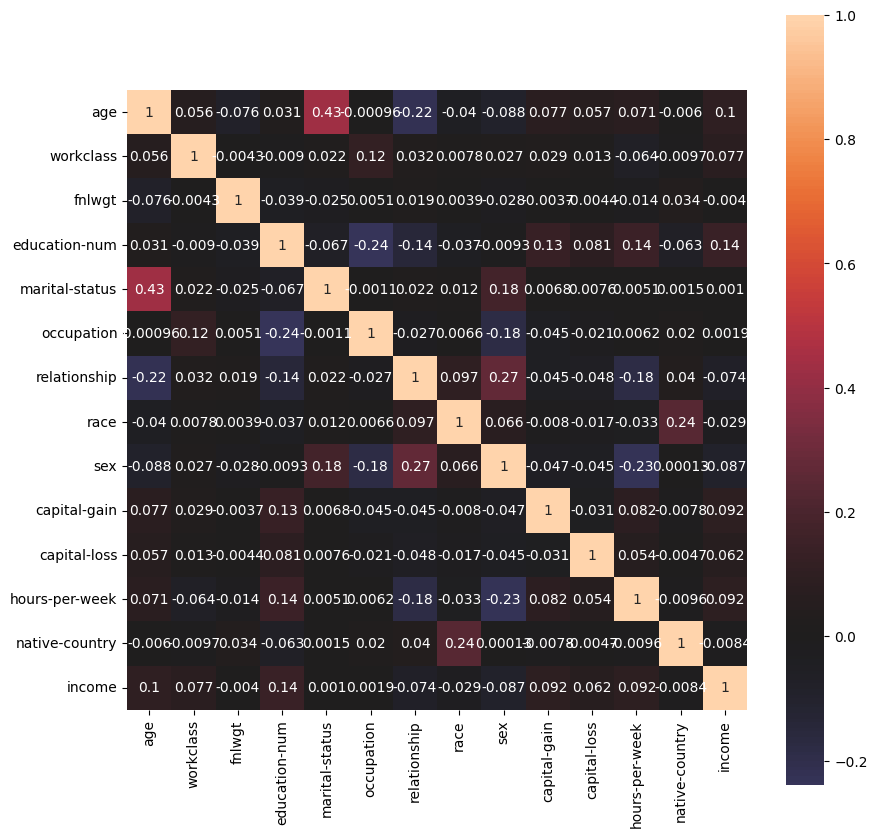

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,10))
sns.heatmap(concatCensus.sort_index().corr(), annot=True, center=0, square=True)

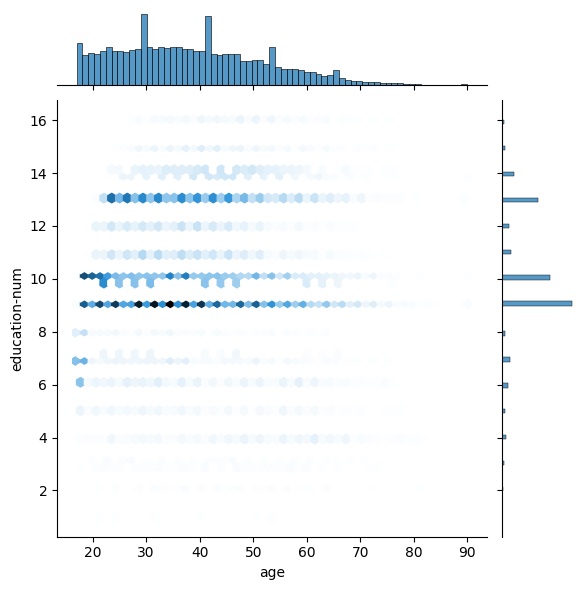

In [41]:
# Graphing the categorical data by by a jointplot in Seaborn -- relation of age and hours per week.
sns.jointplot(x='age', y='education-num', data=concatCensus, kind='hex')

Text(0.5, 0.98, 'Sex Average')

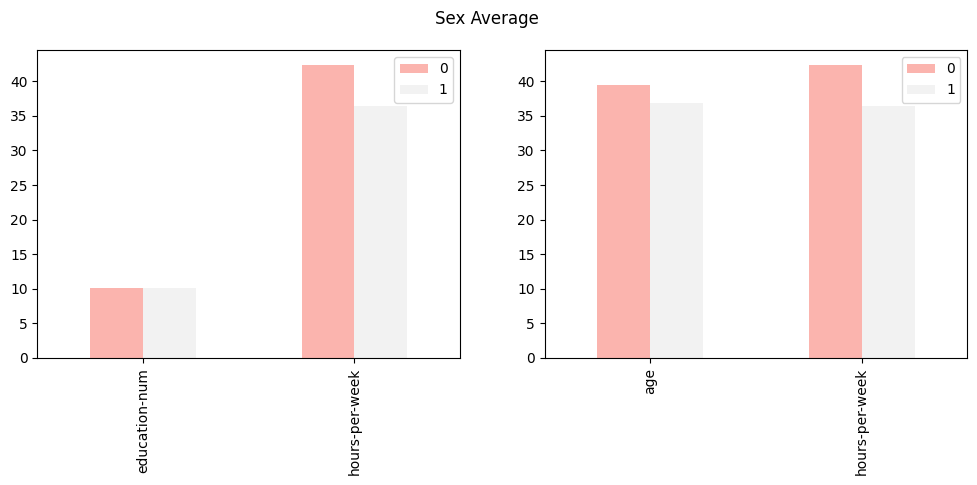

In [44]:
# Creating a bar graph that shows the relationship between sex average.
a = maleCensus.agg({'age': 'mean', 'education-num': 'mean', 'hours-per-week': 'mean'})
b = femaleCensus.agg({'age': 'mean', 'education-num': 'mean', 'hours-per-week': 'mean'})

sexCensus = pd.concat([a,b], axis = 1)
lowValues = sexCensus.iloc[[1,2 ]]
highValues = sexCensus.iloc[[0,2]]

fig, (ax_low, ax_high) = plt.subplots(1,2, figsize=(12,4))

lowValues.plot(kind='bar', cmap='Pastel1', ax=ax_low)
highValues.plot(kind='bar', cmap='Pastel1', ax=ax_high)

fig.suptitle('Sex Average')

<Axes: title={'center': 'Average Income'}>

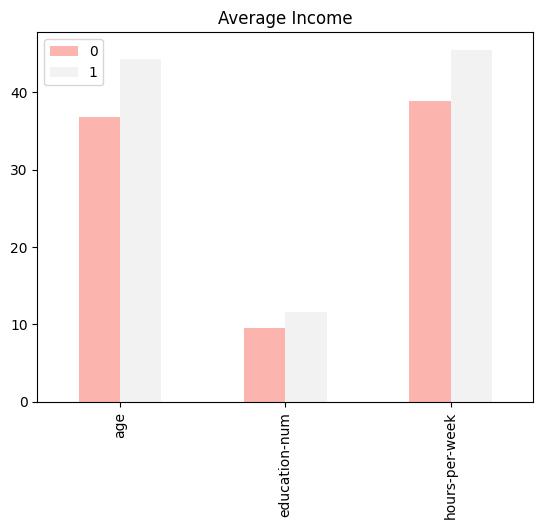

In [46]:
# Creating a bar graph for Average Income
c = lessthanCensus.agg({'age': 'mean', 'education-num': 'mean', 'hours-per-week': 'mean'})
d = morethanCensus.agg({'age': 'mean', 'education-num': 'mean', 'hours-per-week': 'mean'})

averageIncome = pd.concat([c,d], axis = 1)
averageIncome.plot(kind='bar', cmap='Pastel1', title='Average Income')